In [38]:
import numpy as np
import pandas as pd
import sys
import mne 
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
sys.path.insert(0, 'C:/Users/Antoine/github/MEG_pareidolia/python_scripts/Functions')
import MEG_pareidolia_utils
from MEG_pareidolia_utils import *
# import df_ALL_metadata_MEG_sub00to11_epo_RT_sham.csv

df = pd.read_csv('df_ALL_metadata_MEG_sub00to11_epo_long_sham.csv')
DAT_df = pd.read_csv('../questionnaire_data_perso/DAT_MEG.csv')
from statsmodels.stats.multitest import fdrcorrection


source_names, source_paths = get_pareidolia_bids(FOLDERPATH, '00', 'pareidolia', '1', stage = 'stc', cond=None)


.h5


In [66]:
import os
import numpy as np
import tifffile as tiff

# Assuming the path from the image is "/Science/PsychoPy_MEG/images/"
path = "I:/Antoine/Science/Science/PsychoPy_MEG/images/"

# Function to calculate the RMS value of an image
def calculate_rms(image):
    return np.sqrt(np.mean(np.square(image)))

def michelson_contrast(image):
    # Convert to float to avoid overflow issues during subtraction and addition
    image = image.astype(np.float64)
    L_max = np.max(image)
    L_min = np.min(image)
    return (L_max - L_min) / (L_max + L_min)



# Lists to store RMS values
rms_values_contrast = []
rms_values_no_contrast = []

# Loop through the files in the specified directory
for filename in os.listdir(path):
    if filename.lower().endswith('.tif') or filename.lower().endswith('.tiff'):
        # Read the image file
        image = tiff.imread(os.path.join(path, filename))
        # rescale image
        image = image / 255
        # Calculate the RMS value of the image
        rms_value = calculate_rms(image)
        
        # Check if 'contrast' is in the filename and append to the correct list
        if 'contrast' in filename.lower():
            rms_values_contrast.append(rms_value)
        else:
            rms_values_no_contrast.append(rms_value)

# Calculate the mean and std for each group of images
mean_rms_contrast = np.mean(rms_values_contrast)
std_rms_contrast = np.std(rms_values_contrast)
mean_rms_no_contrast = np.mean(rms_values_no_contrast)
std_rms_no_contrast = np.std(rms_values_no_contrast)

(mean_rms_contrast, std_rms_contrast, mean_rms_no_contrast, std_rms_no_contrast)


(0.6095922949739966,
 0.07575199797564805,
 0.6984967176829942,
 0.07088878867718848)

In [67]:
image

array([[0.59607843, 0.64313725, 0.64313725, ..., 0.84705882, 0.72156863,
        0.59607843],
       [0.6627451 , 0.68235294, 0.74901961, ..., 0.50196078, 0.56862745,
        0.78823529],
       [0.78039216, 0.74117647, 0.48235294, ..., 0.34509804, 0.37647059,
        0.63529412],
       ...,
       [0.50196078, 0.47058824, 0.69411765, ..., 0.62352941, 0.58823529,
        0.80784314],
       [0.52941176, 0.58823529, 0.63529412, ..., 0.70196078, 0.64313725,
        0.62352941],
       [0.5372549 , 0.83529412, 0.76862745, ..., 0.6627451 , 0.61568627,
        0.52941176]])

In [3]:
all_stc_data = []
for i in range(len(source_paths)):
    stc = mne.read_source_estimate(source_paths[i])
    all_stc_data.append(stc.data)

In [4]:
np.array(all_stc_data).shape

(52, 2052, 11401)

In [12]:
import mne
custom_path = FOLDERPATH + '/derivatives/mne_python'
subjects_dir = str(mne.datasets.sample.data_path(path=custom_path)) + '\\subjects'
# Assuming 'src' is your source space object and 'subjects_dir' is defined
brain = mne.viz.plot_alignment(subject='fsaverage', src=stc, subjects_dir=subjects_dir,
                               surfaces='white', show_axes=True, dig=True,
                               meg=False, eeg=False, trans=None)


ValueError: src must be a string or instance of SourceSpaces, got <SourceEstimate | 2052 vertices, subject : fsaverage, tmin : -1500.0 (ms), tmax : 8000.0 (ms), tstep : 0.8333333333333334 (ms), data shape : (2052, 11401), ~178.5 MB> (type <class 'mne.source_estimate.SourceEstimate'>)

In [ ]:
# Load source space

subj = "01"
run = 1
task = 'pareidolia'

epochs_name, epochs_path = get_pareidolia_bids(FOLDERPATH, '00', 'pareidolia', '1', stage = 'epo_long', cond=None)
epochs = mne.read_epochs(epochs_path)
info = epochs.pick_types(meg=True, ref_meg=False).info

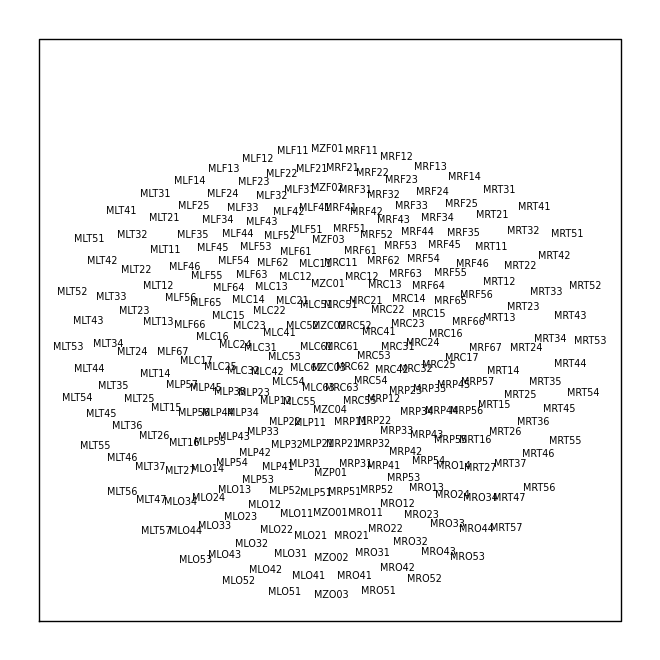

C:\Users\Antoine\AppData\Local\Temp\ipykernel_27608\4290795914.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sensors = df_sensors.append({'name': name, 'index': i}, ignore_index=True)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_27608\4290795914.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sensors = df_sensors.append({'name': name, 'index': i}, ignore_index=True)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_27608\4290795914.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sensors = df_sensors.append({'name': name, 'index': i}, ignore_index=True)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_27608\4290795914.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [9]:


# Plot the sensor locations
layout = mne.channels.find_layout(info)
fig = mne.viz.plot_layout(layout, show=True)

# Set the figure size to be larger
fig.set_size_inches(12, 9)  # You can adjust the size as needed

# init df for names and indices
df_sensors = pd.DataFrame(columns=['name', 'index'])
# To display sensor indices along with their names, we will annotate the indices on the plot
for i, name in enumerate(info['ch_names']):
    sensor_pos = layout.pos[i]  # Get the position of the sensor
    x, y = sensor_pos[0], sensor_pos[1]  # Extract x and y coordinates
    fig.axes[0].annotate(str(i), xy=(x, y), xytext=(x, y),
                         textcoords='axes fraction', fontsize=8,
                         ha='center', va='center')
    df_sensors = df_sensors.append({'name': name, 'index': i}, ignore_index=True)
# Show the plot
plt.show()


In [20]:
df_sensors[57:76]

,name,index
57,MLO11-3105,57
58,MLO12-3105,58
59,MLO13-3105,59
60,MLO14-3105,60
61,MLO21-3105,61
62,MLO22-3105,62
63,MLO23-3105,63
64,MLO24-3105,64
65,MLO31-3105,65
66,MLO32-3105,66


In [54]:
# add DAT = 86.65 for participant 9
#df.loc[df['participant'] == 9, 'DAT'] = 86.65

# save df
df.to_csv('df_ALL_metadata_MEG_sub00to11_epo_long_sham.csv', index=False)

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('df_ALL_metadata_MEG_sub00to11_epo_long_ALL_new.csv')

C:\Users\Antoine\AppData\Local\Temp\ipykernel_10876\1551829799.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_elec0['n_obj'], kde=False, rug=True)


<AxesSubplot:xlabel='n_obj'>

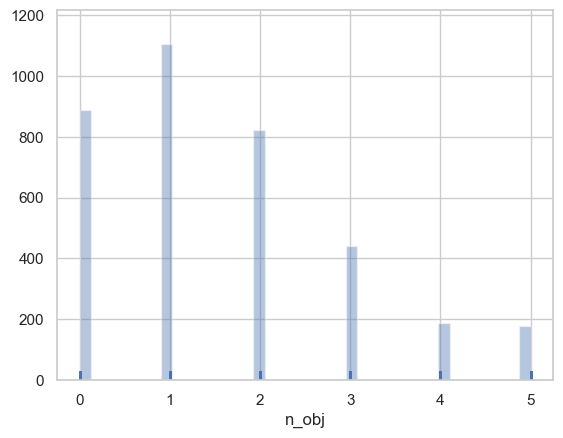

In [5]:
# plot distribution of n_obj for electrode 0

import seaborn as sns
import matplotlib.pyplot as plt


df_elec0 = df[df['electrodes'] == 0]

sns.distplot(df_elec0['n_obj'], kde=False, rug=True)

In [6]:
mean_count = df_elec0['n_obj'].mean()
variance_count = df_elec0['n_obj'].var()

# Calculate the dispersion statistic (variance-to-mean ratio)
dispersion_statistic = variance_count / mean_count

dispersion_statistic

1.1901009780203993

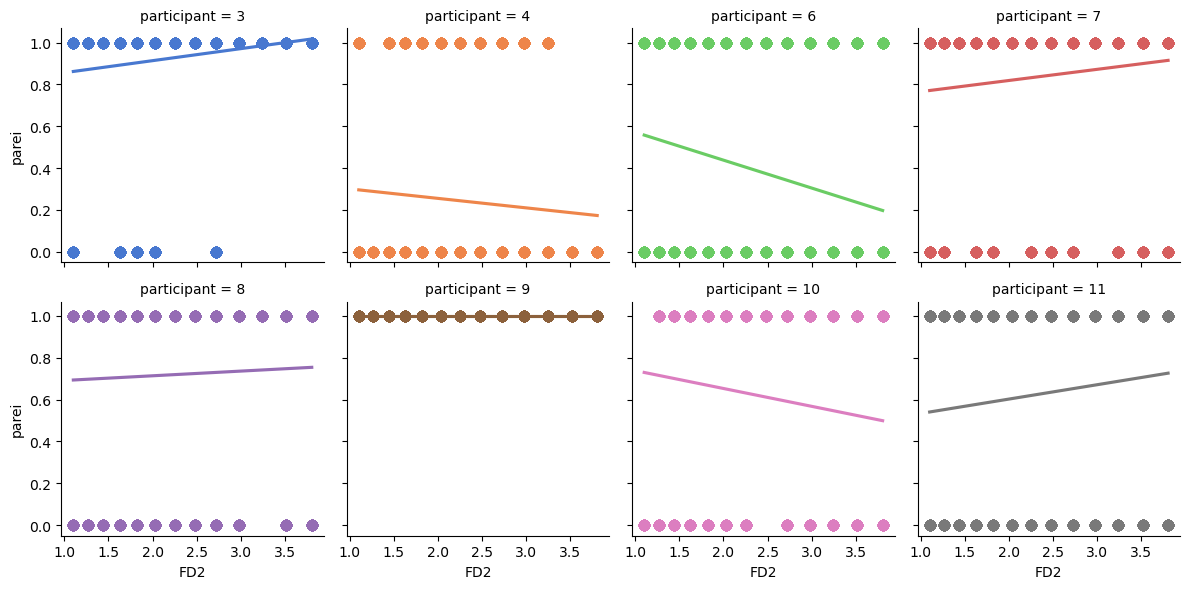

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df['FD2'] = df['FD']**2
# Assume `df` is your DataFrame
# Plotting the interaction of FD and pareidolia for each participant
sns.lmplot(x='FD2', y='parei', col='participant', hue='participant',
           data=df, col_wrap=4, ci=None, palette='muted', height=3,
           scatter_kws={'s': 50, 'alpha': 0.5})

plt.show()


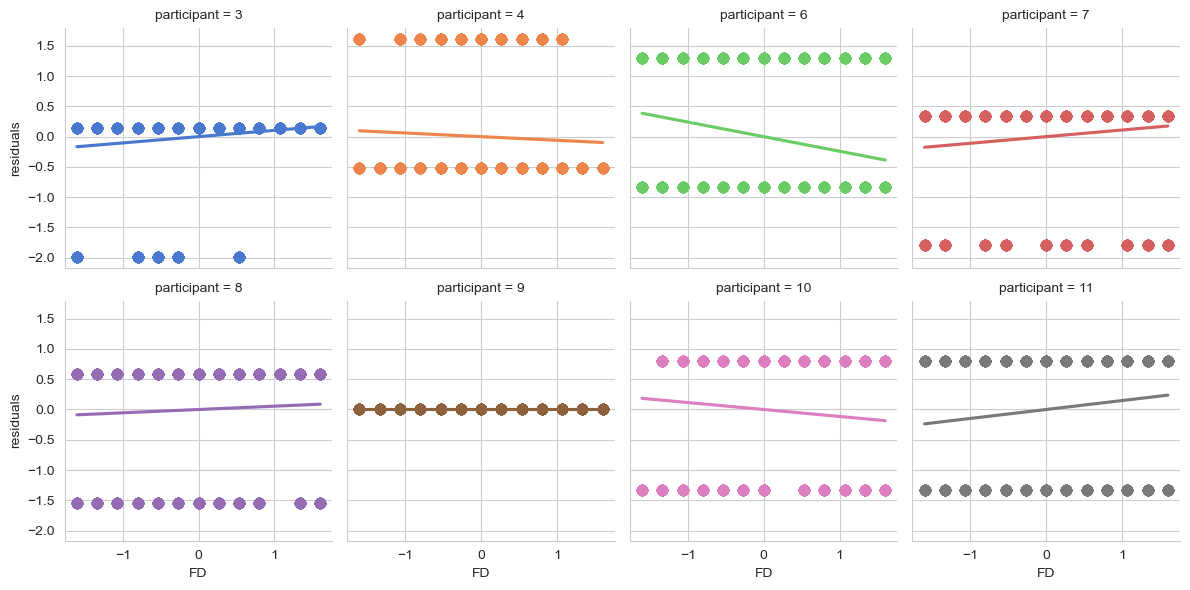

In [51]:
# Fit a simple mixed-effects model without the random slope for FD
model = smf.mixedlm("parei ~ FD", df, groups=df['participant'])
result = model.fit()

# Correct attribute for residuals is `resid`
df['residuals'] = result.resid

# Now you can plot the residuals
sns.lmplot(x='FD', y='residuals', col='participant', hue='participant',
           data=df, col_wrap=4, ci=None, palette='muted', height=3,
           scatter_kws={'s': 50, 'alpha': 0.5})

plt.show()


## SHAM

In [41]:
up_down = {3: 'up', 4: 'up', 6: 'up', 7: 'up', 8: 'up', 9: 'down', 10: 'down', 11: 'up'}

# Dictionary indicating if bloc 7 is 'up' or 'down' for each participant number
up_down = {3: 'up', 4: 'up', 6: 'up', 7: 'up', 8: 'up', 9: 'down', 10: 'down', 11: 'up'}

# Function to determine sham condition
def get_sham_condition(row):
    participant_condition = up_down.get(row['participant'])  # Get the condition for the participant
    # Assign 'up' or 'down' for bloc 7 based on the participant condition
    if row['bloc'] == 7:
        return participant_condition
    # Assign the opposite condition for bloc 8
    elif row['bloc'] == 8:
        return 'down' if participant_condition == 'up' else 'up'
    else:
        return None  # For any other bloc, you can decide how to handle it

# Apply the function to each row in the DataFrame
df['sham_cond'] = df.apply(get_sham_condition, axis=1)
df['sham_cond_num'] = df['sham_cond'].map({'down': 0, 'up': 1})
#remove participant 2
df = df[df.participant != 2]
df['sham_cond_num'] = df['sham_cond'].map({'down': 0, 'up': 1})

In [47]:
df['pos_n_obj'] = df['n_obj']
# put nan when n_obj is 0
df.loc[df['n_obj'] == 0, 'pos_n_obj'] = np.nan
df_avg = df.groupby(['participant', 'trials', 'sham_cond_num']).mean().reset_index()
df_avg

# save df
df_avg.to_csv('df_ALL_metadata_MEG_sub00to11_epo_long_ALL_sham_behav.csv', index=False)


C:\Users\Antoine\AppData\Local\Temp\ipykernel_18124\3616459312.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df.groupby(['participant', 'trials', 'sham_cond_num']).mean().reset_index()


In [39]:

df_avg

,participant,trials,sham_cond_num,parei
0,3,0,0,1.0
1,3,0,1,1.0
2,3,1,0,1.0
3,3,1,1,1.0
4,3,2,0,1.0
...,...,...,...,...
827,11,49,1,1.0
828,11,50,0,1.0
829,11,50,1,1.0
830,11,51,0,1.0


In [154]:
df.columns

Index(['trials', 'electrodes', 'index', 'DiffEn', 'FI', 'Hjorth', 'KFD', 'PEn',
       'PFD', 'RR', 'SFD', 'SVDEn', 'ShanEn', 'SpEn', 'bloc', 'participant',
       'FD', 'FD_class', 'n_obj', 'n_obj_class', 'parei', 'contrast',
       'earlyVSlate', 'delta', 'theta', 'alpha', 'low_beta', 'high_beta',
       'gamma1', 'gamma2', 'LZ', 'DAT', 'sham_cond', 'sham_cond_num',
       'pos_n_obj'],
      dtype='object')

45
45
Participant 3: p = 2.3012807771730754e-07
9
9
Participant 4: p = 1.0
11
11
Participant 6: p = 0.5058518285908016
40
40
Participant 7: p = 0.0021477762127383583
33
33
Participant 8: p = 0.0056826968051127994
52
52
388    1.0
330    4.0
410    4.0
390    3.0
386    3.0
416    5.0
392    2.0
402    3.0
414    4.0
364    3.0
346    2.0
332    4.0
368    3.0
422    2.0
374    1.0
406    2.0
370    2.0
408    3.0
404    2.0
394    4.0
428    2.0
352    5.0
426    3.0
378    3.0
360    5.0
420    3.0
380    3.0
372    2.0
334    5.0
396    4.0
354    3.0
384    3.0
382    4.0
418    2.0
398    5.0
362    3.0
366    4.0
376    1.0
338    2.0
340    2.0
424    3.0
328    4.0
358    5.0
326    1.0
356    5.0
336    4.0
348    3.0
344    2.0
342    3.0
350    4.0
412    4.0
400    2.0
Name: pos_n_obj, dtype: float64
Participant 9: p = 0.36638147159190937
28
28
Participant 10: p = 0.3639878270546565
27
27
Participant 11: p = 1.0


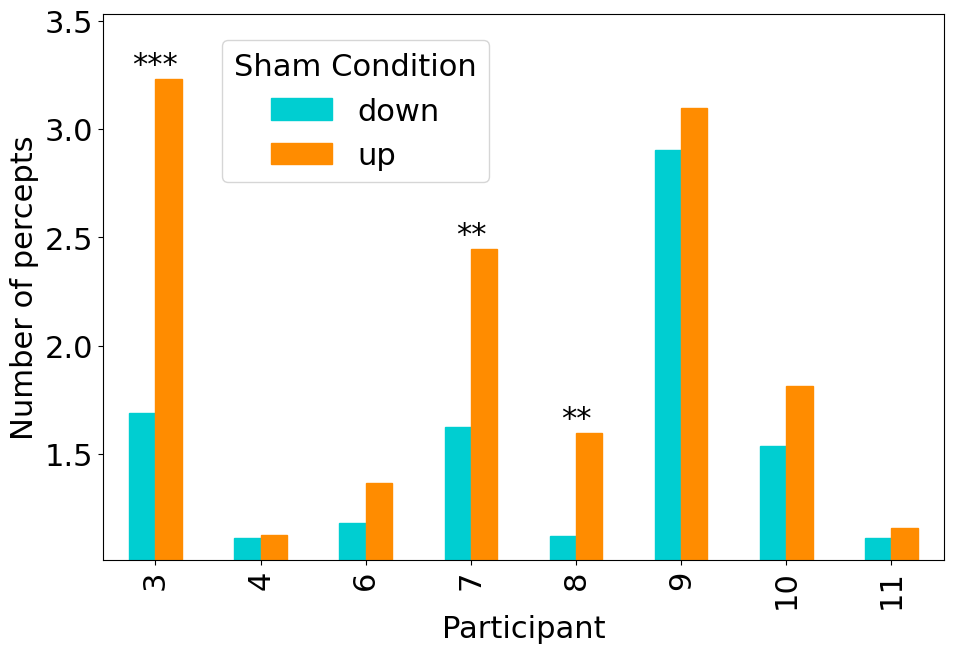

In [163]:
variable = 'pos_n_obj'

# Now, let's group by participant and sham condition, and calculate the mean of parei
grouped_data = df.groupby(['participant', 'sham_cond'])['n_obj'].mean().reset_index()
# create pos_n_obj
grouped_data['pos_n_obj'] = grouped_data['n_obj']
grouped_data.loc[grouped_data['pos_n_obj'] == 0, 'pos_n_obj'] = np.nan
# remove rows with n_obj = 0
grouped_data = grouped_data.dropna(subset=['pos_n_obj'])

# create variable pos_n_obj
df_avg = df.groupby(['participant', 'trials', 'sham_cond_num'])['n_obj'].mean().reset_index()
# create variable pos_n_obj in df_avg which is when n_obj is not 0
df_avg['pos_n_obj'] = df_avg['n_obj']
df_avg.loc[df_avg['pos_n_obj'] == 0, 'pos_n_obj'] = np.nan
# remove rows with n_obj = 0
df_avg = df_avg.dropna(subset=['pos_n_obj'])
# Pivot the data to have participants as rows and sham conditions as columns
pivot_table = grouped_data.pivot(index='participant', columns='sham_cond', values=variable)
p_vals = []
for participant in pivot_table.index:
    up_data = df_avg[(df_avg['participant'] == participant) & (df_avg['sham_cond_num'] == 1)][variable]
    down_data = df_avg[(df_avg['participant'] == participant) & (df_avg['sham_cond_num'] == 0)][variable]
    
    # Check if both conditions have more than one data point
    if len(up_data) > 1 and len(down_data) > 1:
        up_data = up_data.dropna()
        down_data = down_data.dropna()
        # Equalize the number of trials by taking the minimum count from either condition
        min_trials = min(len(up_data), len(down_data))
        up_data = up_data.sample(n=min_trials, random_state=1)  # Use a fixed random state for reproducibility
        down_data = down_data.sample(n=min_trials, random_state=1)
        print(len((up_data)))
        print(len((down_data)))
        if participant == 9:
            print(up_data)
        # Perform the t-test on the equalized data
        t_stat, p_val = stats.ttest_rel(up_data, down_data)
        pivot_table.loc[participant, 'p_value'] = p_val
        p_vals.append(p_val)
        print(f'Participant {participant}: p = {p_val}')
    else:
        # If not enough data, mark as NaN or skip
        pivot_table.loc[participant, 'p_value'] = np.nan
        p_vals.append(np.nan)
        print(f'Not enough data for participant {participant}')



# Plotting the results using a bar chart
import matplotlib.pyplot as plt

# Assuming 'pivot_table' has columns 'up' and 'down' for the conditions
# and a column 'p_value' for the t-test p-values

# Define a function to convert p-values to significance levels
def pval_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    elif p < 0.1:
        return '.'
    else:
        return ''

# Plot the results using a bar chart
ax = pivot_table[['down', 'up']].plot(kind='bar', figsize=(10, 7))

# change color of bars (first 8 are blue, last 8 are red)
colors = ['darkturquoise'] * 8 + ['darkorange'] * 8
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])


# Add title and labels
#plt.title('Average Parei for "up" and "down" Sham Conditions by Participant')
plt.xlabel('Participant')
plt.ylabel('Number of percepts')
plt.legend(title='Sham Condition', bbox_to_anchor=(0.3, 0.98), loc='upper center', labels=['down', 'up'])


# Annotate significance stars
bar_width = 0.65  # This is an estimate and might need to be adjusted
for i, (index, row) in enumerate(pivot_table.iterrows()):
    # Get the center x-position of the bar group
    center_of_group = i
    # Determine the height at which to place the annotation
    height = max(row['up'], row['down']) + 0.0  # Adjust as needed
    # Convert p-value to stars
    stars = pval_to_stars(row['p_value'])
    # Place the annotation above the center of the bar group
    plt.text(center_of_group, height, stars, ha='center', va='bottom')

# Set the y-axis limits
vmin = pivot_table[['up', 'down']].min().min()
vmax = pivot_table[['up', 'down']].max().max()
plt.ylim(vmin - 0.1, vmax + 0.3)

# Increase all text sizes
plt.rcParams.update({'font.size': 22})

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('n_obj_sham_participants.png')

# Show the plot
plt.show()



In [67]:
p_vals

[0.006885565485584219,
 0.10897465832606318,
 0.0008324782671251139,
 0.08968289509657125,
 0.037660304906318394,
 nan,
 0.07145967804809851,
 0.026327653626724873]

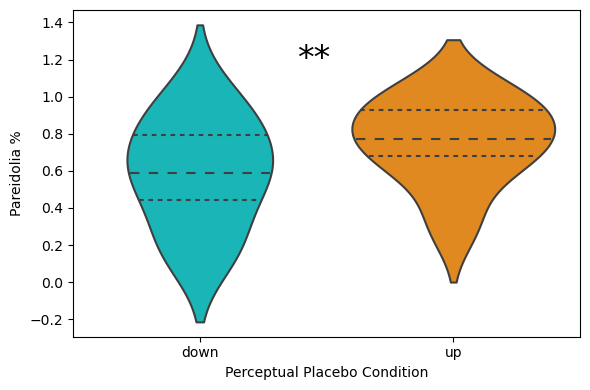

T-statistic: 4.612
P-value: 0.002
t(7) = 4.612, p = 0.002, d = 1.630
The difference between the 'up' and 'down' sham conditions is statistically significant.


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

var = 'parei'
grouped_data = df.groupby(['participant', 'sham_cond'])[var].mean().reset_index()
# Create the violin plot using seaborn
plt.figure(figsize=(6, 4))
# set colors for the two conditions
colors = ['darkturquoise', 'darkorange']
sns.violinplot(x='sham_cond', y=var, data=grouped_data, palette=colors, inner='quartile')
#plt.title('Effect of Perceptual Placebo Induction\non Pareidolia')
plt.xlabel('Perceptual Placebo Condition')
plt.ylabel('Pareidolia %')
# add two stars in the middle of the plot
plt.text(0.45, 1.2, '**', fontsize=24, horizontalalignment='center', verticalalignment='center')


plt.tight_layout()
# add '{' verticaly in the middle of the plot
#plt.text(0.45, 1.1, '{', fontsize=24, horizontalalignment='center', verticalalignment= 'center')
#plt.savefig('pareidolia_sham_participants_violin.png')
plt.show()

# Compute a paired t-test since the measurements come from the same participants
up = grouped_data[grouped_data['sham_cond'] == 'up'][var]
down = grouped_data[grouped_data['sham_cond'] == 'down'][var]
t_stat, p_val = stats.ttest_rel(up, down)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# print the stats in that format : (t(df) = t_stat, p = p_val, η2 = effect_size)
differences = [x - y for x, y in zip(up, down)]

# Calculate standard deviation of differences
std_diff = np.std(differences, ddof=1)

# Calculate Cohen's d
cohen_d = np.mean(differences) / std_diff
print(f"t({len(up) - 1}) = {t_stat:.3f}, p = {p_val:.3f}, d = {cohen_d:.3f}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("The difference between the 'up' and 'down' sham conditions is statistically significant.")
else:
    print("There's no statistically significant difference between the 'up' and 'down' sham conditions.")


In [13]:
differences

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
Name: parei, dtype: float64

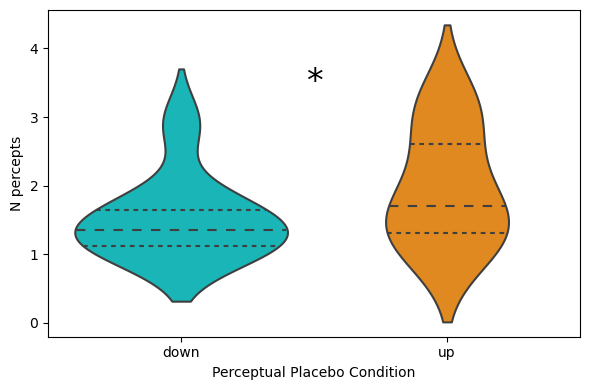

T-statistic: 2.441
P-value: 0.045
t(7) = 2.441, p = 0.045, d = 0.863
The difference between the 'up' and 'down' sham conditions is statistically significant.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

var = 'pos_n_obj'
# create variable 'pos_n_obj' where n_obj is not 0
df['pos_n_obj'] = df['n_obj']
df.loc[df['pos_n_obj'] == 0, 'pos_n_obj'] = np.nan
grouped_data = df.groupby(['participant', 'sham_cond'])[var].mean().reset_index()
# Create the violin plot using seaborn
plt.figure(figsize=(6, 4))
sns.violinplot(x='sham_cond', y=var, data=grouped_data, palette=colors, inner='quartile')
#plt.title('Effect of Perceptual Placebo Induction\non Pareidolia')
plt.xlabel('Perceptual Placebo Condition')
plt.ylabel('N percepts')
# add two stars in the middle of the plot
plt.text(0.5, 3.5, '*', fontsize=24, horizontalalignment='center', verticalalignment='center')
# add '{' verticaly in the middle of the plot
#plt.text(0.45, 1.1, '{', fontsize=24, horizontalalignment='center', verticalalignment= 'center')
plt.tight_layout()
plt.savefig('ppos_n_obj_sham_participants_violin.png')
plt.show()

# Compute a paired t-test since the measurements come from the same participants
up = grouped_data[grouped_data['sham_cond'] == 'up'][var]
down = grouped_data[grouped_data['sham_cond'] == 'down'][var]
t_stat, p_val = stats.ttest_rel(up, down)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

differences = [x - y for x, y in zip(up, down)]

# Calculate standard deviation of differences
std_diff = np.std(differences, ddof=1)

# Calculate Cohen's d
cohen_d = np.mean(differences) / std_diff
print(f"t({len(up) - 1}) = {t_stat:.3f}, p = {p_val:.3f}, d = {cohen_d:.3f}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("The difference between the 'up' and 'down' sham conditions is statistically significant.")
else:
    print("There's no statistically significant difference between the 'up' and 'down' sham conditions.")


## GLMss

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'sham_cond' is coded as 0 for 'down' and 1 for 'up' in your DataFrame
# If not, you need to convert the 'sham_cond' to a numerical binary variable
# You might need to convert the sham condition to numerical values before running the GLM


# Fit the mixed effects model
md = smf.mixedlm("pos_n_obj ~ sham_cond_num * DAT", df, groups=df["participant"], re_formula="~sham_cond_num")
mdf = md.fit()

print(mdf.summary())


                Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    pos_n_obj   
No. Observations:      150930     Method:                REML        
No. Groups:            8          Scale:                 0.7839      
Min. group size:       6750       Log-Likelihood:        -195853.2656
Max. group size:       28080      Converged:             Yes         
Mean group size:       18866.2                                       
---------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------------------
Intercept                  1.274    5.335  0.239 0.811  -9.182 11.730
sham_cond_num             -3.897    4.267 -0.913 0.361 -12.259  4.465
DAT                        0.003    0.061  0.049 0.961  -0.116  0.122
sham_cond_num:DAT          0.049    0.049  1.018 0.309  -0.046  0.144
Group Var                  0.370    

In [34]:
df

,trials,electrodes,index,DiffEn,FI,Hjorth,KFD,PEn,PFD,RR,...,theta,alpha,low_beta,high_beta,gamma1,gamma2,LZ,DAT,sham_cond,sham_cond_num
7020,0,0,0,-28.506944,0.619027,2.578853,3.248307,0.999950,1.004370,0.095863,...,-242.209003,-245.765160,-247.890936,-249.715386,-254.069482,-255.473291,0.713805,91.143189,up,1
7021,0,1,0,-28.433042,0.616851,2.634187,3.293005,0.999982,1.004211,0.094739,...,-241.601603,-242.882776,-245.656991,-247.958270,-252.234142,-255.313634,0.717939,91.143189,up,1
7022,0,2,0,-28.310392,0.658336,2.953988,3.383378,0.999985,1.003664,0.074274,...,-240.543159,-241.550853,-244.795958,-248.357248,-251.387771,-255.106069,0.712427,91.143189,up,1
7023,0,3,0,-28.164573,0.668910,3.045364,3.275235,0.999999,1.003593,0.070281,...,-239.556414,-239.949466,-243.577304,-246.403557,-253.434224,-255.898236,0.719317,91.143189,up,1
7024,0,4,0,-28.137102,0.702542,3.380814,2.934826,0.999972,1.003020,0.055501,...,-238.190423,-240.422268,-244.170682,-247.359831,-252.856351,-252.960808,0.726207,91.143189,up,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231655,51,265,0,-28.401963,0.613076,2.517438,2.974009,0.999998,1.004423,0.102218,...,-245.618428,-245.609441,-245.889234,-247.048210,-252.338944,-256.713558,0.717939,91.399824,down,0
231656,51,266,0,-28.192427,0.643035,2.817432,2.843795,1.000000,1.004088,0.082923,...,-245.376626,-242.548369,-242.550726,-249.361029,-252.901730,-255.993761,0.709671,91.399824,down,0
231657,51,267,0,-28.325044,0.565729,2.193930,3.045428,0.999974,1.005012,0.143067,...,-243.952503,-244.231343,-245.956455,-249.830806,-252.790594,-254.279861,0.684867,91.399824,down,0
231658,51,268,0,-28.488985,0.544133,2.025713,3.265039,0.999939,1.005410,0.170546,...,-244.784493,-245.987820,-248.215605,-251.807580,-253.852623,-254.302002,0.691757,91.399824,down,0


In [42]:
avg_df.columns

Index(['trials', 'sham_cond', 'sham_cond_num', 'DiffEn', 'FI', 'Hjorth', 'KFD',
       'PEn', 'PFD', 'RR', 'SFD', 'SVDEn', 'ShanEn', 'SpEn', 'bloc', 'FD',
       'FD_class', 'n_obj', 'n_obj_class', 'parei', 'contrast', 'earlyVSlate',
       'delta', 'theta', 'alpha', 'low_beta', 'high_beta', 'gamma1', 'gamma2',
       'LZ', 'DAT'],
      dtype='object')

In [17]:
avg_df

,trials,sham_cond,sham_cond_num,participant,DiffEn,FI,Hjorth,KFD,PEn,PFD,...,delta,theta,alpha,low_beta,high_beta,gamma1,gamma2,LZ,DAT,pos_n_obj
0,0,down,0,3,-28.109443,0.638208,2.895414,3.093031,0.999940,1.003948,...,-238.530911,-239.725862,-240.859622,-243.293382,-247.099843,-250.859203,-253.438707,0.711136,91.143189,4.0
1,0,down,0,6,-28.071658,0.699215,3.355914,2.846508,0.999965,1.003205,...,-231.099894,-237.560027,-238.964811,-241.429502,-244.189376,-250.753820,-253.646039,0.717418,91.930462,1.0
2,0,down,0,7,-28.302511,0.597489,2.587067,3.190028,0.999948,1.004571,...,-240.711723,-242.818721,-245.010452,-247.924216,-250.629869,-251.866076,-254.245101,0.705282,89.528963,3.0
3,0,down,0,9,-28.137373,0.584321,2.461451,3.170106,0.999856,1.004648,...,-238.570555,-242.011232,-243.504336,-246.474128,-248.614901,-252.942174,-254.413378,0.690134,86.650000,2.0
4,0,down,0,11,-28.224860,0.651961,2.986425,3.036462,0.999974,1.003885,...,-239.174282,-243.127203,-242.057740,-243.141626,-245.761786,-251.879846,-254.479337,0.711667,91.399824,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,51,up,1,3,-28.087250,0.646481,2.989369,3.095914,0.999933,1.003916,...,-239.289185,-238.689859,-238.163508,-243.110309,-247.164648,-251.103686,-253.321578,0.713652,91.143189,1.0
555,51,up,1,4,-28.194964,0.655045,3.090905,3.065105,0.999974,1.003828,...,-237.739326,-242.126921,-241.664841,-242.867717,-246.597961,-251.509471,-255.045769,0.713667,81.296306,2.0
556,51,up,1,8,-27.782736,0.724797,4.013148,2.751325,0.999962,1.003039,...,-237.200145,-236.125451,-233.443620,-238.560429,-243.623800,-249.639996,-253.390169,0.714137,84.335070,1.0
557,51,up,1,9,-28.074158,0.544687,2.037954,3.531189,0.999748,1.005100,...,-236.017143,-241.618620,-243.319604,-246.371634,-249.069537,-251.120413,-252.084102,0.679886,86.650000,2.0


c:\Users\Antoine\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Antoine\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\Antoine\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Antoine\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   pos_n_obj
No. Observations:   559       Method:               REML     
No. Groups:         8         Scale:                0.8167   
Min. group size:    25        Log-Likelihood:       -757.5025
Max. group size:    104       Converged:            Yes      
Mean group size:    69.9                                     
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------
Intercept          2.982    5.231  0.570 0.569  -7.271 13.235
sham_cond_num     -6.355    2.345 -2.710 0.007 -10.951 -1.759
DAT               -0.022    0.059 -0.371 0.711  -0.137  0.094
sham_cond_num:DAT  0.078    0.027  2.950 0.003   0.026  0.130
Group Var          0.000                                     
Group x FD Cov     0.005    0.227                            
FD Var             0

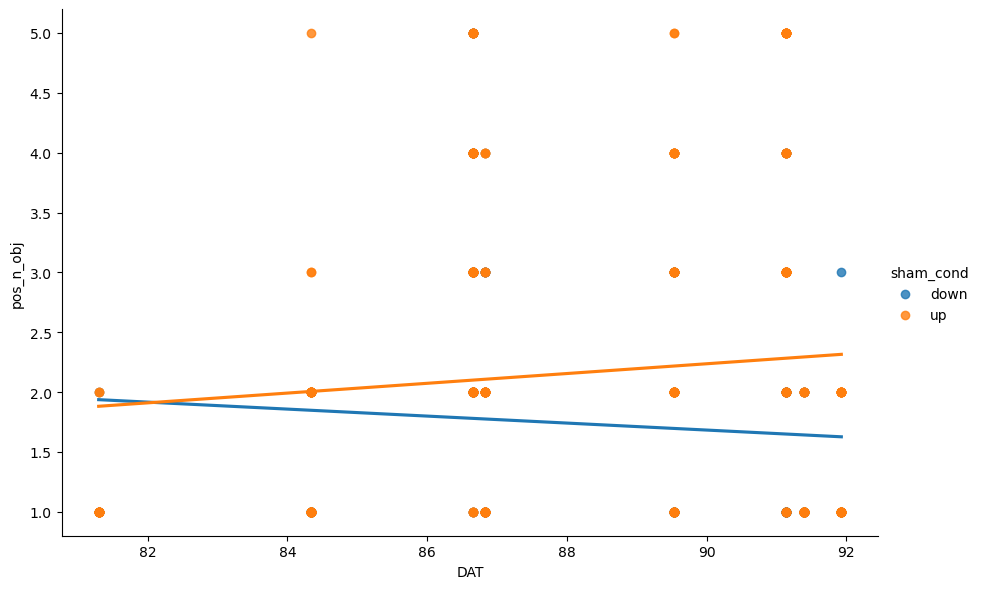

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Assuming your dataframe is called df

# remove rows when pos_n_obj is 0 or nan
df = df[df['pos_n_obj'] != 0]
df = df.dropna(subset=['pos_n_obj'])

# List of columns you don't want to average
non_avg_cols = ['trials', 'participant', 'electrodes', 'index', 'sham_cond', 'sham_cond_num']

# Columns you want to average
avg_cols = [col for col in df.columns if col not in non_avg_cols]

# Average the data across electrodes
avg_df = df.groupby(['trials', 'sham_cond', 'sham_cond_num', 'participant'])[avg_cols].mean().reset_index()

# Ensure 'FD' is in the correct format (continuous variable)
# And 'sham_cond' should be encoded as a numerical binary variable
avg_df['sham_cond_num'] = avg_df['sham_cond'].map({'down': 0, 'up': 1})

# Fit the mixed effects model with an interaction between 'sham_cond_num' and 'FD'
md = smf.mixedlm("pos_n_obj ~ sham_cond_num * DAT ", avg_df, groups=avg_df["participant"], re_formula="~FD")
mdf = md.fit()

# plot interaction effect
sns.lmplot(x='DAT', y='pos_n_obj', hue='sham_cond', data=avg_df, ci=None, height=6, aspect=1.5)

print(mdf.summary())


C:\Users\Antoine\AppData\Local\Temp\ipykernel_17820\2691536745.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "replace" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('DAT_n_obj_sham_participants.png', dpi=300, replace=True)


<Figure size 500x1200 with 0 Axes>

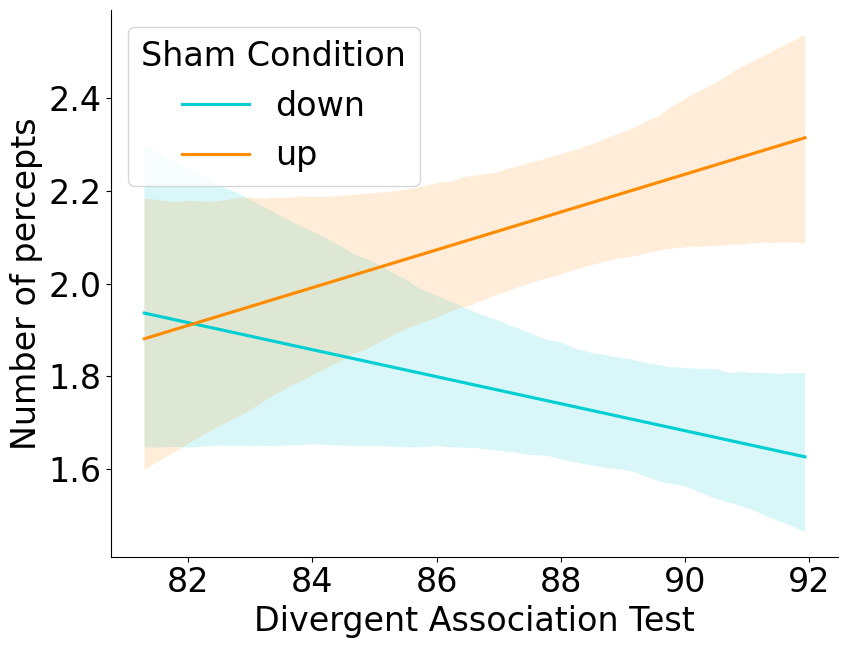

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# set figure size
plt.figure(figsize=(5, 12))
# set colors
colors = ['darkturquoise', 'darkorange']
palette = sns.color_palette(colors)
# Create a line plot for each sham condition
fig = sns.lmplot(data=avg_df, x='DAT', y='pos_n_obj', hue='sham_cond', palette=palette, height=7, aspect=1.5, scatter=False, legend=False)
# change figsize
fig.fig.set_figwidth(9)
#change font size
plt.rcParams.update({'font.size': 24})
#plt.title('Interaction between\nPerceptual Placebo and Creativity')
plt.xlabel('Divergent Association Test')
plt.legend(title='Sham Condition')
plt.ylabel('Number of percepts')
# increase font size of everything
plt.tight_layout()
plt.savefig('DAT_n_obj_sham_participants.png', dpi=300, replace=True)

plt.show()


In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Assuming your dataframe is called df



# List of columns you don't want to average
non_avg_cols = ['trials', 'participant', 'electrodes', 'index', 'sham_cond', 'sham_cond_num']

# Columns you want to average
avg_cols = [col for col in df.columns if col not in non_avg_cols]

# Average the data across electrodes
avg_df = df.groupby(['trials', 'sham_cond', 'sham_cond_num', 'participant'])[avg_cols].mean().reset_index()

# Ensure 'FD' is in the correct format (continuous variable)
# And 'sham_cond' should be encoded as a numerical binary variable
avg_df['sham_cond_num'] = avg_df['sham_cond'].map({'down': 0, 'up': 1})

# Fit the mixed effects model with an interaction between 'sham_cond_num' and 'FD'
md = smf.mixedlm("parei ~ sham_cond_num * DAT ", avg_df, groups=avg_df["participant"], re_formula="~FD")
mdf = md.fit()

print(mdf.summary())

import seaborn as sns
import matplotlib.pyplot as plt

# set figure size
plt.figure(figsize=(5, 12))
# set colors
colors = ['darkturquoise', 'darkorange']
palette = sns.color_palette(colors)
# Create a line plot for each sham condition
fig = sns.lmplot(data=avg_df, x='DAT', y='parei', hue='sham_cond', palette=palette, height=7, aspect=1.5, scatter=False, legend=False)
# change figsize
fig.fig.set_figwidth(9)
#change font size
plt.rcParams.update({'font.size': 24})
#plt.title('Interaction between\nPerceptual Placebo and Creativity')
plt.xlabel('Divergent Association Test')
plt.legend(title='Sham Condition')
plt.ylabel('Pareidolia %')
# increase font size of everything
plt.tight_layout()
plt.savefig('DAT_parei_sham_participants.png', dpi=300, replace=True)

plt.show()


ValueError: argument family not permitted for MixedLM initialization

C:\Users\Antoine\AppData\Local\Temp\ipykernel_17820\3364248613.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "replace" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('DAT_parei_sham_participants.png', dpi=300, replace=True)


<Figure size 500x1200 with 0 Axes>

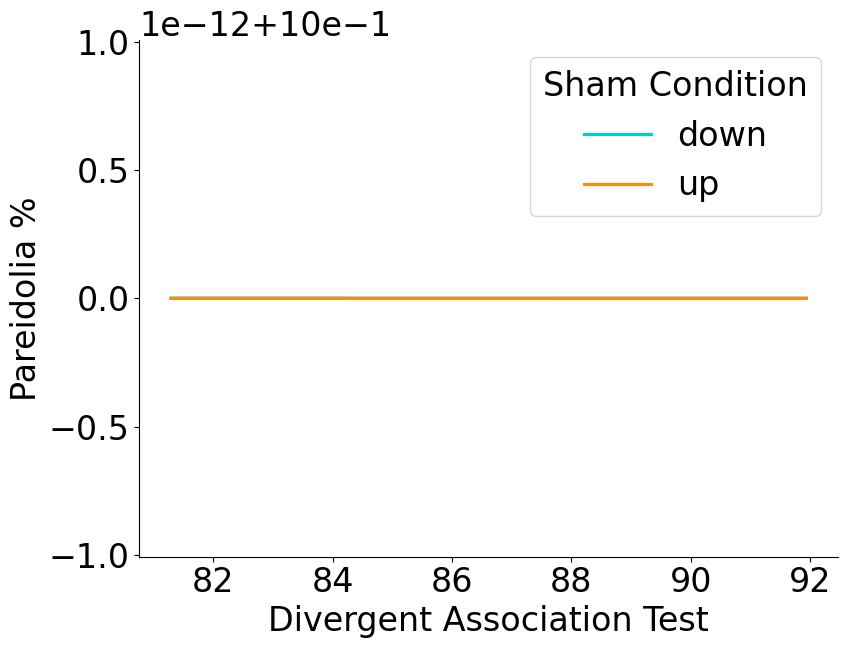

In [11]:
from statsmodels.regression.linear_model import RegressionResults

# Fit the first model without the random slope for FD
model1 = smf.mixedlm("n_obj ~ sham_cond_num * FD * DAT", df, groups=df["participant"])
mdf1 = model1.fit()

# Fit the second model with the random slope for FD
model2 = smf.mixedlm("n_obj ~ sham_cond_num * FD * DAT", df, groups=df["participant"], re_formula="~FD")
mdf2 = model2.fit()




In [1]:
import numpy as np
import antropy as ant
np.random.seed(1234567)
x = np.random.normal(size=3000)
# Permutation entropy
print(ant.perm_entropy(x, normalize=True))
# Spectral entropy
print(ant.spectral_entropy(x, sf=100, method='welch', normalize=True))
# Singular value decomposition entropy
print(ant.svd_entropy(x, normalize=True))
# Approximate entropy
print(ant.app_entropy(x))
# Sample entropy
print(ant.sample_entropy(x))
# Hjorth mobility and complexity
print(ant.hjorth_params(x))
# Number of zero-crossings
print(ant.num_zerocross(x))
# Lempel-Ziv complexity
print(ant.lziv_complexity('01111000011001', normalize=True))

0.9995371694290869
0.9940882825422431
0.9999110978316078
2.015221318528564
2.198595813245399
(1.4313385010057378, 1.215335712274099)
1531
1.3597696150205727


In [3]:
import numpy as np
import h5py

hilbert_file, hilbert_path = get_pareidolia_bids(
                    FOLDERPATH, "00", 'pareidolia', 1, stage="Hilbert_long"
                )
with h5py.File(hilbert_path, "r") as f:
    hilbert_data = f["hilbert_data"][:]

In [12]:
import neurokit2 as nk
hilbert_data.shape


(7, 2, 52, 270, 11401)

In [31]:
delta = hilbert_data[0, 0, 10, 15, :]
def rescale_array(arr, new_min, new_max):
    min_arr = np.min(arr)
    max_arr = np.max(arr)
    scaled_array = new_min + ((arr - min_arr) * (new_max - new_min) / (max_arr - min_arr))
    return scaled_array

In [34]:
#rescale delta between -2 and 2
delta = rescale_array(delta, -1, 1)
dfa_exponent, info = nk.fractal_dfa(delta)

In [35]:
dfa_exponent

1.7517851491908962

## Classifiers

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import accuracy_score

freq_cols = ['delta', 'theta', 'alpha', 'low_beta', 'high_beta', 'gamma1', 'gamma2', 'LZ']

# Step 1: Data Preparation
# Assuming each row is a sample from a participant and 'participant' is a unique identifier for each participant
X = df[freq_cols + ['n_obj']]
y = df['sham_cond_num']
groups = df['participant']

# Step 2: Classifier Selection
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: LOSO CV
gkf = GroupKFold(n_splits=len(groups.unique()))  # Create as many splits as there are unique participants
scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring='accuracy')  # This returns accuracy for each fold

# Step 4: Evaluation
mean_accuracy = np.mean(scores)
print(f"Mean Accuracy using LOSO CV: {mean_accuracy:.4f}")


Mean Accuracy using LOSO CV: 0.5466


In [3]:
6.081273e-02

0.06081273

### One classifier per electrode

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

freq_cols = ['delta', 'theta', 'alpha', 'low_beta', 'high_beta', 'gamma1', 'gamma2', 'LZ']

# Assuming you have an 'electrodes' column in df that specifies the electrode
electrodes = df['electrodes'].unique()

# Store results
balanced_accuracies = []
feature_importances = []

# Step 2: Classifier Selection
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: LOSO CV
gkf = GroupKFold(n_splits=len(groups.unique()))

for electrode in electrodes:
    # Filter data for current electrode
    sub_df = df[df['electrodes'] == electrode]
    X = sub_df[freq_cols + ['n_obj']]
    y = sub_df['sham_cond_num']
    groups = sub_df['participant']

    # We'll use cross_val_predict to get predicted labels and then compute balanced accuracy
    predicted_labels = cross_val_predict(clf, X, y, groups=groups, cv=gkf)
    acc = balanced_accuracy_score(y, predicted_labels)

    # Train on the full electrode data to get feature importances
    clf.fit(X, y)
    importance = clf.feature_importances_

    # Append to the result lists
    balanced_accuracies.append(acc)
    feature_importances.append(importance)
    print(f"Electrode {electrode}: {acc:.4f}")

print(f"Balanced Accuracies: {balanced_accuracies}")




Electrode 0: 0.5204
Electrode 1: 0.4964
Electrode 2: 0.5216
Electrode 3: 0.5325
Electrode 4: 0.5288
Electrode 5: 0.5132
Electrode 6: 0.5240
Electrode 7: 0.5120
Electrode 8: 0.5613
Electrode 9: 0.5493
Electrode 10: 0.5312
Electrode 11: 0.5385
Electrode 12: 0.5613
Electrode 13: 0.5577
Electrode 14: 0.5649
Electrode 15: 0.5685
Electrode 16: 0.5180
Electrode 17: 0.5589
Electrode 18: 0.5793
Electrode 19: 0.5817
Electrode 20: 0.5757
Electrode 21: 0.5252
Electrode 22: 0.5913
Electrode 23: 0.5649
Electrode 24: 0.5481
Electrode 25: 0.5493
Electrode 26: 0.5409
Electrode 27: 0.5541
Electrode 28: 0.5012
Electrode 29: 0.5373
Electrode 30: 0.5325
Electrode 31: 0.5505
Electrode 32: 0.5264
Electrode 33: 0.5252
Electrode 34: 0.5228
Electrode 35: 0.5120
Electrode 36: 0.5228
Electrode 37: 0.5024
Electrode 38: 0.5264
Electrode 39: 0.5541
Electrode 40: 0.4988
Electrode 41: 0.5132
Electrode 42: 0.5168
Electrode 43: 0.4964
Electrode 44: 0.5216
Electrode 45: 0.5397
Electrode 46: 0.5000
Electrode 47: 0.5373
El

NameError: name 'list_of_channel_names' is not defined

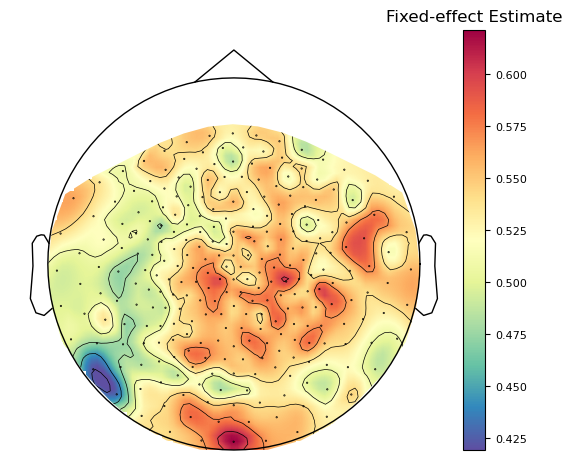

In [16]:
reportpath = 'C:/Users/Antoine/github/MEG_pareidolia/'
fig, ax = topoplot(
        balanced_accuracies,
        info,
        vmin=0.5,
        vmax=np.max(balanced_accuracies),
        showtitle=True,
        figpath=os.path.join(reportpath, 'random_forest_balanced_accuracies_Sham.png'),
        ax_title="Fixed-effect Estimate",
    )

In [84]:
mean_importances

array([0.11273795, 0.1135701 , 0.11639812, 0.11629479, 0.1196887 ,
       0.12240826, 0.12536802, 0.09700259, 0.07653147])

KeyError: 'delta'

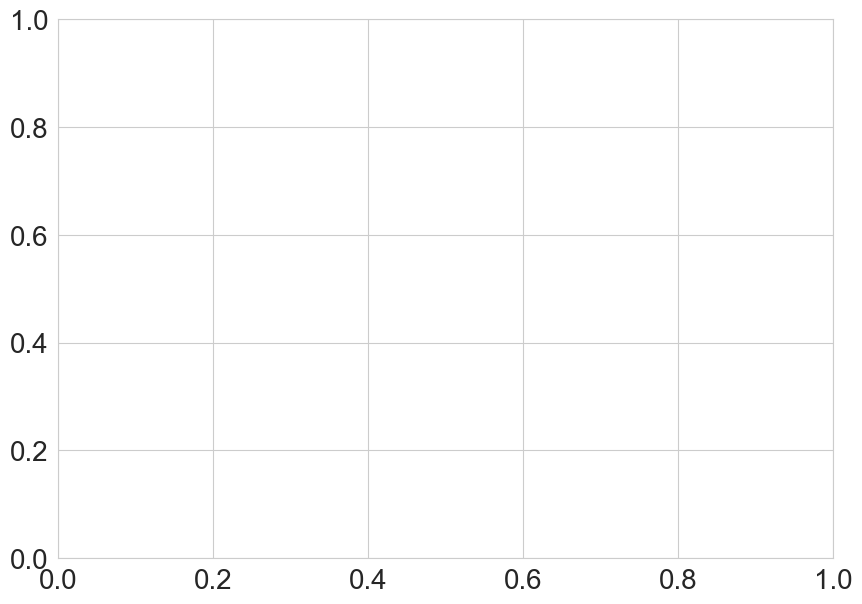

In [83]:
import seaborn as sns
# plot feature importances

# Get the mean feature importances across electrodes
mean_importances = np.mean(feature_importances, axis=0)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=freq_cols, y=mean_importances, ax=ax)
plt.title("Feature Importances")
plt.xlabel("Frequency Bands")
plt.ylabel("Importance")
plt.show()

### Hyperparameter tuning

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GroupKFold, cross_val_predict, GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

freq_cols = ['delta', 'theta', 'alpha', 'low_beta', 'high_beta', 'gamma1', 'gamma2', 'LZ']

# Assuming you have an 'electrodes' column in df that specifies the electrode
electrodes = df['electrodes'].unique()

# Store results
results = {
    'RandomForest': [],
    'SVC': []
}
feature_importances = []

# Parameters for grid search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

clfs = {
    'RandomForest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3),
    'SVC': GridSearchCV(SVC(random_state=42), param_grid_svc, cv=3)
}

# LOSO CV
gkf = GroupKFold(n_splits=len(groups.unique()))

for electrode in electrodes:
    # Filter data for current electrode
    sub_df = df[df['electrodes'] == electrode]
    X = sub_df[freq_cols + ['n_obj']]
    y = sub_df['sham_cond_num']
    groups = sub_df['participant']

    # Standardizing the data for SVC
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    
    for clf_name, clf in clfs.items():
        # We'll use cross_val_predict to get predicted labels and then compute balanced accuracy
        if clf_name == 'SVC':
            predicted_labels = cross_val_predict(clf, X_scaled, y, groups=groups, cv=gkf)
        else:
            predicted_labels = cross_val_predict(clf, X, y, groups=groups, cv=gkf)
            
        acc = balanced_accuracy_score(y, predicted_labels)
        results[clf_name].append(acc)

        # Train on the full electrode data to get feature importances (only for RF)
        if clf_name == 'RandomForest':
            clf.fit(X, y)
            importance = clf.best_estimator_.feature_importances_
            feature_importances.append(importance)

        print(f"Electrode {electrode}, Classifier {clf_name}: {acc:.4f}")



Electrode 0, Classifier RandomForest: 0.5349
Electrode 0, Classifier SVC: 0.5565
Electrode 1, Classifier RandomForest: 0.5120
Electrode 1, Classifier SVC: 0.5625
Electrode 2, Classifier RandomForest: 0.5204
Electrode 2, Classifier SVC: 0.5553
Electrode 3, Classifier RandomForest: 0.5300
Electrode 3, Classifier SVC: 0.5469
Electrode 4, Classifier RandomForest: 0.5385
Electrode 4, Classifier SVC: 0.5505
Electrode 5, Classifier RandomForest: 0.5240
Electrode 5, Classifier SVC: 0.5829
Electrode 6, Classifier RandomForest: 0.5072
Electrode 6, Classifier SVC: 0.5733
Electrode 7, Classifier RandomForest: 0.5349
Electrode 7, Classifier SVC: 0.5685
Electrode 8, Classifier RandomForest: 0.5601
Electrode 8, Classifier SVC: 0.5625
Electrode 9, Classifier RandomForest: 0.5649
Electrode 9, Classifier SVC: 0.5781
Electrode 10, Classifier RandomForest: 0.5493
Electrode 10, Classifier SVC: 0.5853
Electrode 11, Classifier RandomForest: 0.5144
Electrode 11, Classifier SVC: 0.5793
Electrode 12, Classifier

NameError: name 'list_of_channel_names' is not defined

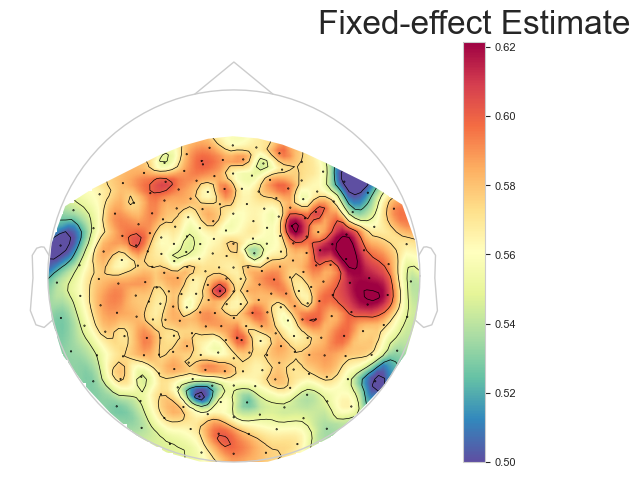

In [89]:
reportpath = 'C:/Users/Antoine/github/MEG_pareidolia/'
fig, ax = topoplot(
        results['SVC'],
        info,
        vmin=0.5,
        vmax=np.max(balanced_accuracies),
        showtitle=True,
        figpath=os.path.join(reportpath, 'random_forest_balanced_accuracies_Sham.png'),
        ax_title="Fixed-effect Estimate",
    )

## GLMs

In [40]:
import pandas as pd
import statsmodels.formula.api as smf
import mne
import numpy as np

# Sample data load
# df = pd.read_csv('path_to_your_data.csv')

df['sham_cond_num'] = df['sham_cond'].map({'down': 0, 'up': 1})
# Z-score the frequency columns
freq_cols = ['delta', 'theta', 'alpha', 'low_beta', 'high_beta', 'gamma1', 'gamma2', 'LZ']
freq_cols = ['n_obj', 'DAT', 'sham_cond_num']
df[freq_cols] = (df[freq_cols] - df[freq_cols].mean()) / df[freq_cols].std()
#interaction_terms = ["FD:"+col for col in freq_cols]
# create interaction terms with all possible pairs of two-way interactions
interaction_terms = []
for i in range(len(freq_cols)):
    for j in range(i+1, len(freq_cols)):
        interaction_terms.append(freq_cols[i] + ":" + freq_cols[j])
all_terms = freq_cols + interaction_terms
# Assuming you have a column named 'electrodes' in df that specifies the electrode number
electrodes = df['electrodes'].unique()

# Create a dictionary to store the mixed-effects results for each electrode
results = {}
effects = {col: [] for col in all_terms}  # To store effects for each frequency band
pv = {col: [] for col in all_terms}  # To store p-values for each frequency band

for electrode in electrodes:
    # Subset data for current electrode
    sub_df = df[df['electrodes'] == electrode]
    
    print(f"Running mixed-effects model for electrode {electrode}")
    formula = "theta ~ " + " + ".join(all_terms)
    # Fit a mixed-effects model with the formula and a random intercept for each participant
    model = smf.mixedlm(formula, sub_df, groups=sub_df["participant"])
    result = model.fit()
    results[electrode] = result

    # Extract fixed effects for each frequency band and store
    for effect in freq_cols + interaction_terms:
        effects[effect].append(result.params[effect])
        pv[effect].append(result.pvalues[effect])

# Plotting topomaps
# This requires electrode locations. Assuming you have them in a standard format:
# info = mne.create_info(ch_names=list_of_channel_names, sfreq=sample_frequency, ch_types='eeg')




Running mixed-effects model for electrode 0
Running mixed-effects model for electrode 1
Running mixed-effects model for electrode 2
Running mixed-effects model for electrode 3
Running mixed-effects model for electrode 4
Running mixed-effects model for electrode 5
Running mixed-effects model for electrode 6
Running mixed-effects model for electrode 7
Running mixed-effects model for electrode 8
Running mixed-effects model for electrode 9
Running mixed-effects model for electrode 10
Running mixed-effects model for electrode 11
Running mixed-effects model for electrode 12
Running mixed-effects model for electrode 13
Running mixed-effects model for electrode 14
Running mixed-effects model for electrode 15
Running mixed-effects model for electrode 16
Running mixed-effects model for electrode 17
Running mixed-effects model for electrode 18
Running mixed-effects model for electrode 19
Running mixed-effects model for electrode 20
Running mixed-effects model for electrode 21
Running mixed-effect

In [106]:
import pandas as pd
import statsmodels.formula.api as smf
import mne
import numpy as np

# Sample data load
# df = pd.read_csv('path_to_your_data.csv')
df['FD2'] = df['FD']**2
# Z-score the frequency columns
freq_cols = ['LZ', 'SFD', 'PFD', 'KFD', 'Hjorth', 'n_obj']
df[freq_cols] = (df[freq_cols] - df[freq_cols].mean()) / df[freq_cols].std()
interaction_terms = ["sham_cond_num:"+col for col in freq_cols]
all_terms = freq_cols + interaction_terms
# Assuming you have a column named 'electrodes' in df that specifies the electrode number
electrodes = df['electrodes'].unique()

# Create a dictionary to store the mixed-effects results for each electrode
results = {}
effects = {col: [] for col in all_terms}  # To store effects for each frequency band
pv = {col: [] for col in all_terms}  # To store p-values for each frequency band

for electrode in electrodes:
    # Subset data for current electrode
    sub_df = df[df['electrodes'] == electrode]
    
    
    formula = "FD2 ~ " + " + ".join(all_terms)
    # Fit a mixed-effects model with the formula and a random intercept for each participant
    model = smf.mixedlm(formula, sub_df, groups=sub_df["participant"])
    result = model.fit()
    results[electrode] = result

    # Extract fixed effects for each frequency band and store
    for effect in freq_cols + interaction_terms:
        effects[effect].append(result.params[effect])
        pv[effect].append(result.pvalues[effect])

# Plotting topomaps
# This requires electrode locations. Assuming you have them in a standard format:
# info = mne.create_info(ch_names=list_of_channel_names, sfreq=sample_frequency, ch_types='eeg')




c:\Users\Antoine\anaconda3\envs\biotuner\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Antoine\anaconda3\envs\biotuner\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\Antoine\anaconda3\envs\biotuner\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Antoine\anaconda3\envs\biotuner\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Antoine\anaconda3\envs\biotuner\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum L

Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_long.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_43332\305229815.py:5: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_long.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path)


    Found the data of interest:
        t =   -1500.00 ...    8000.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
52 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [29]:
results[1].params

Intercept              0.714985
n_obj                  0.000151
DAT                    0.001162
sham_cond_num         -0.000767
n_obj:DAT             -0.000108
n_obj:sham_cond_num   -0.000519
DAT:sham_cond_num      0.000483
Group Var              3.148442
dtype: float64

69
69


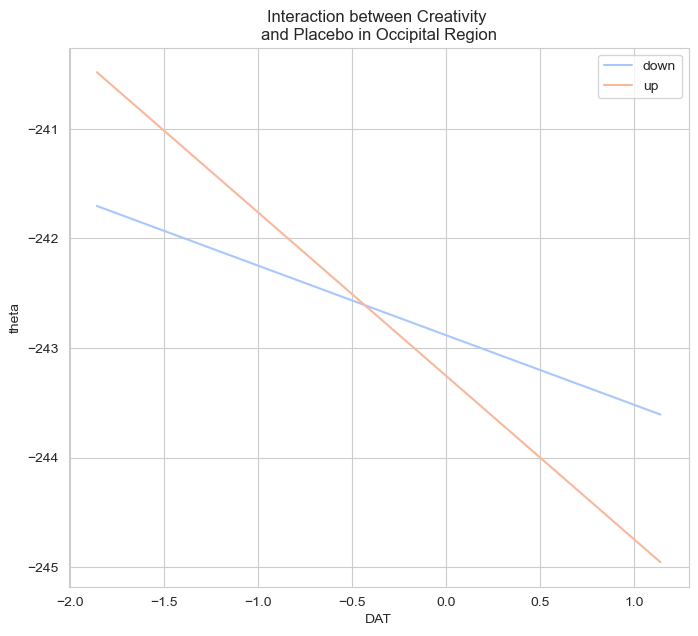

In [44]:
var = 'DAT'
vars = ['DAT', 'LZ', 'n_obj']
# add quadratic term for FD

# Extract the fixed effects for the interaction term across all electrodes
interaction_values = {electrode: results[electrode].params.get(f"{var}:sham_cond_num", 0) for electrode in electrodes}

# Find the electrode with the highest absolute fixed-effect value for the interaction term
max_electrode = min(interaction_values, key=lambda electrode: interaction_values[electrode])

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the electrode with the highest interaction effect
sub_df = df[df['electrodes'] == max_electrode]


# Set the style of Seaborn
sns.set_style("whitegrid")

# Create a scatter plot of the data
plt.figure(figsize=(8, 7))
# Create a color palette for unique sham conditions
unique_sham_conds = sub_df['sham_cond_num'].unique()
#order the sham conditions
unique_sham_conds.sort()
sham_cond_names = ['down', 'up']
palette = sns.color_palette("coolwarm", n_colors=len(unique_sham_conds))
color_map = dict(zip(unique_sham_conds, palette))

# Scatter plot using explicit color mapping
#sns.scatterplot(data=sub_df, x="gamma1", y="n_obj", hue="sham_cond_num", palette=color_map)

gamma1_values = np.linspace(sub_df[var].min(), sub_df[var].max(), 100)
for sham_cond, sham_name in zip(unique_sham_conds, sham_cond_names):
    pred_df = pd.DataFrame({var: gamma1_values, 'sham_cond_num': [sham_cond] * 100})
    # remove var from vars
    vars_ = vars.copy()
    vars_.remove(var)
    # Fill with mean values of other predictors
    for col in vars_:
        pred_df[col] = df[col].mean()

    pred_values = results[max_electrode].predict(pred_df)
    plt.plot(gamma1_values, pred_values, color=color_map[sham_cond], label=sham_name)
    #print max elec
    print(max_electrode)
plt.title("Interaction between Creativity \nand Placebo in Occipital Region")
plt.xlabel(var)
plt.ylabel("theta")
plt.legend()
#plt.savefig('C:/Users/Antoine/github/MEG_pareidolia/OUTPUTS/sham_topomaps/interaction_gamma2_sham_occi.png')
plt.show()


In [68]:
def topoplot(
    toplot,
    ch_xy,
    showtitle=False,
    titles=None,
    savefig=True,
    figpath=r"C:\Users\Dell\Jupyter\BrainHackSchool2019_AB\EEG_music_scripts",
    vmin=None,
    vmax=None,
    ax_title="t values",
    mask=None,
):
    # create fig
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # create a topomap for each data array
    if vmin == None:
        vmin = np.min(toplot)
    if vmax == None:
        vmax = np.max(toplot)
    image, _ = mne.viz.plot_topomap(
        data=toplot,
        pos=ch_xy,
        cmap="Spectral_r",
        vlim=[vmin, vmax],
        outlines="head",
        sphere=0.19,
        axes=ax,
        show=False,
        mask=mask,
    )
    # option for title
    if showtitle == True:
        ax.set_title(titles, fontdict={"fontsize": 10, "fontweight": "heavy"})
    # add a colorbar at the end of the line (weird trick from https://www.martinos.org/mne/stable/auto_tutorials/stats-sensor-space/plot_stats_spatio_temporal_cluster_sensors.html#sphx-glr-auto-tutorials-stats-sensor-space-plot-stats-spatio-temporal-cluster-sensors-py)
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)
    ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_colorbar.set_title(ax_title)
    ax_colorbar.tick_params(labelsize=8)
    # save plot if specified
    if savefig == True:
        plt.savefig(figpath, dpi=300)
    # plt.show()
    return fig, ax

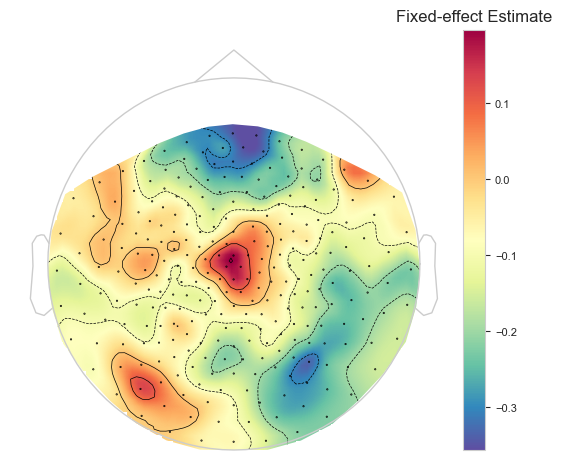

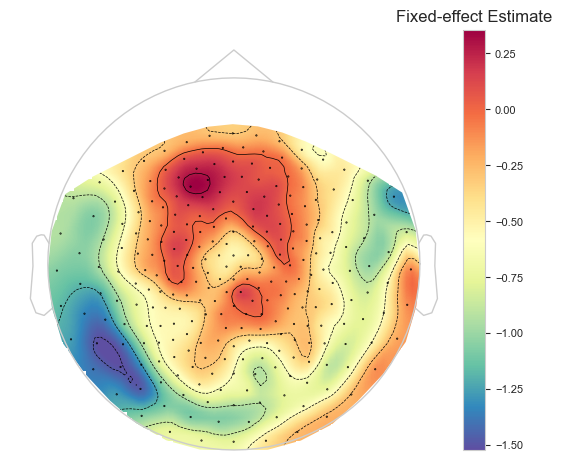

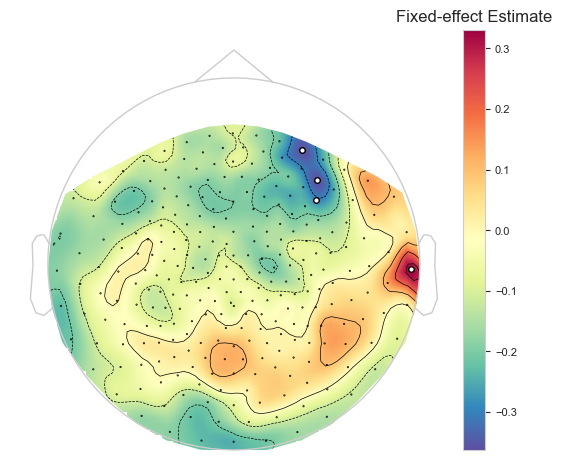

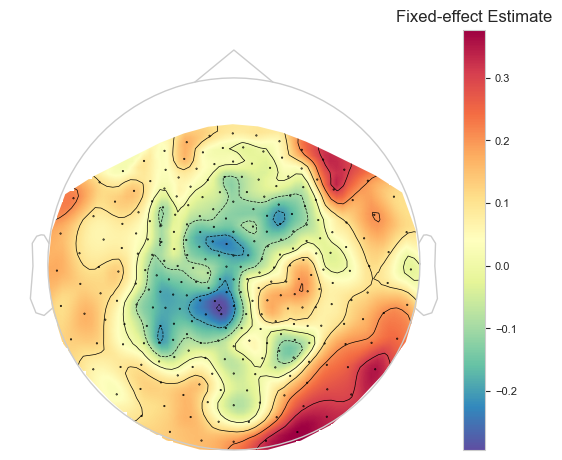

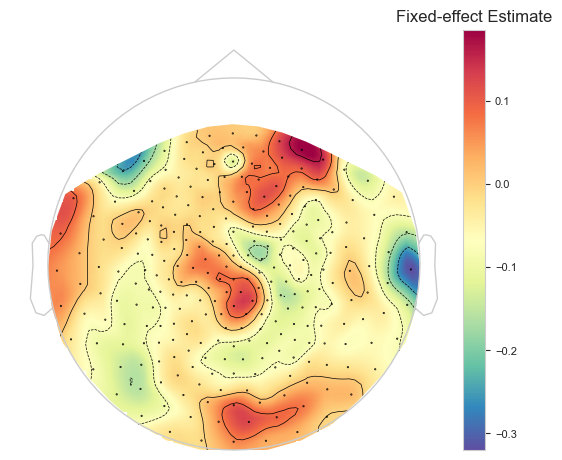

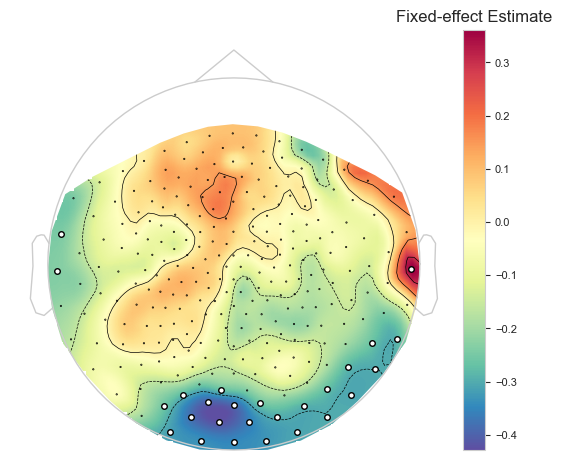

In [42]:
reportpath = '../OUTPUTS/sham_topomaps'
import os
if not os.path.exists(reportpath):
    os.makedirs(reportpath)

FDR=True
pval_thresh=0.05

# Use a consistent colormap for all plots
cmap = 'coolwarm'
all_values = []
for electrode in electrodes:
    all_values.append(results[electrode].params)
extreme = np.max(np.abs(all_values))
vmax = extreme
vmin = -extreme
for col in all_terms:
    data = np.array(effects[col])
    pvals = np.array(pv[col])
    
    if FDR is True:
        _, pvals = fdrcorrection(pvals, alpha=pval_thresh, method="indep")
    
    mask = p_values_boolean_1d(pvals, threshold=pval_thresh)

    
    
    # remove : from col for filename
    filename_col = col.replace(':', 'BY')
    
    fig, ax = topoplot(
        data,
        info,
        vmin=-0.2,
        vmax=0.2,
        showtitle=True,
        mask=mask,
        figpath=os.path.join(reportpath, f'topoplot_{filename_col}_sham_theta_FD_norand_nobj.png'),
        ax_title="Fixed-effect Estimate",
    )


In [17]:
print(models[100].summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    DAT   No. Observations:                  832
Model:                            GLM   Df Residuals:                      824
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                          11.710
Method:                          IRLS   Log-Likelihood:                -2200.1
Date:                Wed, 01 Nov 2023   Deviance:                       9649.4
Time:                        23:55:08   Pearson chi2:                 9.65e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.08107
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.4945      0.197    448.979      0.0

In [60]:
mdf2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM Dependent Variable: n_obj       
No. Observations:  224640  Method:             REML        
No. Groups:        8       Scale:              0.8588      
Min. group size:   28080   Log-Likelihood:     -301723.8082
Max. group size:   28080   Converged:          Yes         
Mean group size:   28080.0                                 
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.627    0.145  4.311 0.000  0.342  0.912
sham_cond_num     0.231    0.021 10.852 0.000  0.189  0.272
FD                0.263    0.210  1.255 0.209 -0.148  0.674
sham_cond_num:FD  0.256    0.014 18.400 0.000  0.229  0.284
Group Var         0.167    0.110                           
Group x FD Cov   -0.015    0.100                           
FD Var            0.351    0.181                           
===========================================================

"""

In [23]:
# Questionnaires_Infos_perso_MEG

infos_perso = pd.read_csv('../questionnaire_data_perso/Questionnaires_Infos_perso_MEG.csv')
infos_perso

,Horodateur,Numéro de participant,Nom,Prénom,Genre,Âge,Lieu de naissance,Ethnicité,Adresse courriel,Numéro de téléphone portable,...,Vous a-t-on déjà diagnostiqué des troubles psychologiques ?,"Si oui, précisez.1",Suivez-vous un traitement médicamenteux ces derniers 3 mois ?,"Si oui, précisez:",Avez-vous une correction de votre vision ?,"Si oui, portez-vous actuellement vos lunettes ou lentilles cornéennes ?",Avez-vous consommé de l’alcool ou de la drogue dans les dernières heures ?,"Si oui, précisez:.1","Sur une échelle de 1 à 4, veuillez juger la qualité de votre sommeil la nuit dernière",À quelle fréquence pratiquez-vous la méditation ?
0,01/04/2021 13:17:25,0.0,Harel,Yann,Homme,27.0,"Lyon, FRANCE",Caucasien,yharel109@gmail.com,4384963390,...,Non,NaN,Non,NaN,Oui,Oui,Non,NaN,3.0,Occasionnellement
1,10/05/2021 16:39:46,1.0,Savard-Beaudoin,Maxime,Homme,30.0,Longueil,Causasian,savardbeaudoinm@hotmail.com,4385204650,...,Non,NaN,Non,NaN,Non,NaN,Oui,du pot (daily smoker),3.0,Occasionnellement
2,11/05/2021 19:37:48,2.0,Couture,Tristan-B,Homme,27.0,Paris,Quebecois,tristan.bcouture@gmail.com,5142394360,...,Non,NaN,Non,NaN,Oui,Non,Non,NaN,3.0,Jamais
3,26/05/2021 09:12:10,3.0,Brault-Miron,Guillaume,Homme,37.0,Montreal,Oui,mystik.gbm@gmail.com,4389334729,...,Oui,Depression aigue 2005,Non,NaN,Non,NaN,Non,NaN,4.0,Occasionnellement
4,10/06/2021 09:14:44,4.0,El khantour,Clara,Femme,19.0,Saverne (France),Europeen,clara.elkhantour@gmail.com,514-444-8917,...,Non,NaN,Non,NaN,Oui,Oui,Non,NaN,4.0,Jamais
5,17/06/2021 10:23:14,5.0,TIFFET,FREDERIC,Homme,29.0,MONTREAL,CAUCASIEN,FTIFFET@GMAIL.COM,5142959613,...,Non,NaN,Non,NaN,Oui,Oui,Non,NaN,1.0,Occasionnellement
6,07/12/2021 12:20:07,6.0,O'Byrne,Jordan,Homme,34.0,"Ottawa, ON",blanc/caucasien,jordan.obyrne@gmail.com,514-441-8308,...,Non,NaN,Non,NaN,Oui,Oui,Non,NaN,4.0,Occasionnellement
7,21/12/2021 09:38:18,7.0,Galipeau,Sophie,Femme,27.0,Montreal,blanc,sophie.galipeau3@gmail.com,5146254542,...,Non,NaN,Non,NaN,Non,Non,Non,NaN,3.0,Jamais
8,21/12/2021 13:18:18,8.0,Silva,Christopher,Homme,30.0,New-York,Caucasian,Christophersilva300@gmail.com,4388872814,...,Non,NaN,Non,NaN,Oui,Oui,Non,NaN,4.0,Jamais
9,08/02/2022 09:15:29,9.0,Cloutier,Mathieu,Homme,30.0,"Longueuil, Qc, ca",Caucasien,mathieucloutier01@gmail.com,5148155612,...,Non,NaN,Non,NaN,Oui,Non,Non,NaN,2.0,Occasionnellement


In [16]:
import pandas as pd

# Assuming df is your DataFrame and it has already been loaded with your data

# This will group the data by participant and then by bloc within each participant
grouped = df.groupby(['participant', 'bloc'])

# Now we can iterate over each group and print the participant and their bloc(s)
for name, group in grouped:
    participant, bloc = name
    print(f"Participant {participant} has bloc {bloc}")


Participant 2 has bloc 8
Participant 3 has bloc 7
Participant 3 has bloc 8
Participant 4 has bloc 7
Participant 4 has bloc 8
Participant 6 has bloc 7
Participant 6 has bloc 8
Participant 7 has bloc 7
Participant 7 has bloc 8
Participant 8 has bloc 7
Participant 8 has bloc 8
Participant 9 has bloc 7
Participant 9 has bloc 8
Participant 10 has bloc 7
Participant 10 has bloc 8
Participant 11 has bloc 7
Participant 11 has bloc 8


In [17]:
df

,trials,electrodes,index,DiffEn,FI,Hjorth,KFD,PEn,PFD,RR,...,earlyVSlate,delta,theta,alpha,low_beta,high_beta,gamma1,gamma2,LZ,DAT
0,0,0,0,-28.245576,0.684110,3.188625,3.111831,0.999998,1.003473,0.060873,...,0,-240.091839,-245.072199,-245.599646,-244.789873,-248.447365,-251.507130,-253.648898,0.720695,82.436589
1,0,1,0,-28.124929,0.691330,3.255288,3.027201,0.999999,1.003331,0.058416,...,0,-239.200858,-242.992677,-244.358437,-242.911461,-246.551065,-250.581025,-253.522759,0.737231,82.436589
2,0,2,0,-27.984575,0.725674,3.707871,2.904234,0.999995,1.002976,0.044111,...,0,-238.967426,-241.040380,-244.546249,-240.842331,-242.949779,-248.936710,-253.153441,0.734475,82.436589
3,0,3,0,-27.813195,0.736543,3.918917,2.610948,0.999947,1.002829,0.040173,...,0,-238.570516,-239.973246,-242.865398,-239.957742,-240.524223,-248.475082,-255.001049,0.719317,82.436589
4,0,4,0,-27.654133,0.782468,4.667309,2.550783,0.999939,1.002423,0.025964,...,0,-237.861662,-240.021250,-239.643211,-240.290766,-240.338176,-247.744276,-252.929665,0.722073,82.436589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231655,51,265,0,-28.401963,0.613076,2.517438,2.974009,0.999998,1.004423,0.102218,...,1,-241.266411,-245.618428,-245.609441,-245.889234,-247.048210,-252.338944,-256.713558,0.717939,91.399824
231656,51,266,0,-28.192427,0.643035,2.817432,2.843795,1.000000,1.004088,0.082923,...,1,-239.852033,-245.376626,-242.548369,-242.550726,-249.361029,-252.901730,-255.993761,0.709671,91.399824
231657,51,267,0,-28.325044,0.565729,2.193930,3.045428,0.999974,1.005012,0.143067,...,1,-243.384537,-243.952503,-244.231343,-245.956455,-249.830806,-252.790594,-254.279861,0.684867,91.399824
231658,51,268,0,-28.488985,0.544133,2.025713,3.265039,0.999939,1.005410,0.170546,...,1,-243.917183,-244.784493,-245.987820,-248.215605,-251.807580,-253.852623,-254.302002,0.691757,91.399824


In [11]:
import sys
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
sys.path.insert(0, 'C:/Users/Antoine/github/MEG_pareidolia/python_scripts/Functions')
import MEG_pareidolia_utils
from MEG_pareidolia_utils import *
epochs_name, epochs_path = get_pareidolia_bids(FOLDERPATH, '00', 'pareidolia', 1, stage = 'epo_RT', cond=None)
epochs = mne.read_epochs(epochs_path)

Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_50864\2647246703.py:7: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_RT.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path)


    Found the data of interest:
        t =   -2000.00 ...    -500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
52 matching events found
No baseline correction applied
0 projection items activated


In [12]:
epochs

Number of events,52
Events,False_RT: 3RT_nopar: 12RT_par: 37
Time range,-2.000 – -0.500 s
Baseline,-2.000 – -1.500 s
